# Step 1: Load Dataset
We are starting the Exploratory Data Analysis (EDA) for the financial news dataset.  
In this step, we will import necessary libraries and load the CSV file into a pandas DataFrame.


In [2]:
import pandas as pd
import numpy as np

# Load the dataset (adjust path if needed)
data_path = "../data/raw_analyst_ratings.csv"
df = pd.read_csv(data_path, index_col=False)

# Display first 5 rows to check
df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Step 2: Data Overview
In this step, we will inspect the dataset to understand its structure, data types, and check for missing values.  
We will also calculate some basic descriptive statistics to get a sense of the data.


In [3]:
# General info about the dataset
df.info()

# Summary statistics for numeric columns
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

# Step 3: Headline Length and Publisher Count
In this step, we analyze the text length of headlines and check which publishers contribute most to the dataset.
This helps us understand the dataset distribution and identify any active publishers.


In [4]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Descriptive stats for headline length
headline_stats = df['headline_length'].describe()
print("Headline Length Stats:\n", headline_stats)

# Count number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nTop 10 publishers by article count:\n", publisher_counts.head(10))


Headline Length Stats:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Top 10 publishers by article count:
 publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


# Step 4: Basic Visualizations
Here, we will create simple visualizations to better understand the dataset:
1. Distribution of headline lengths.
2. Top 10 publishers by article count.
Visualizations help us spot patterns and outliers quickly.


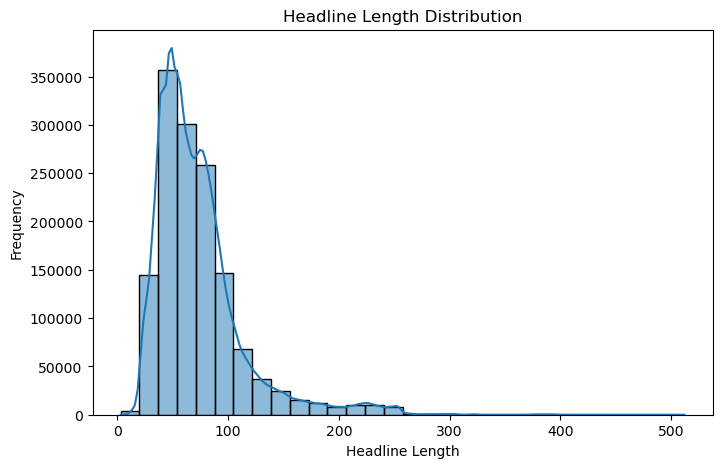

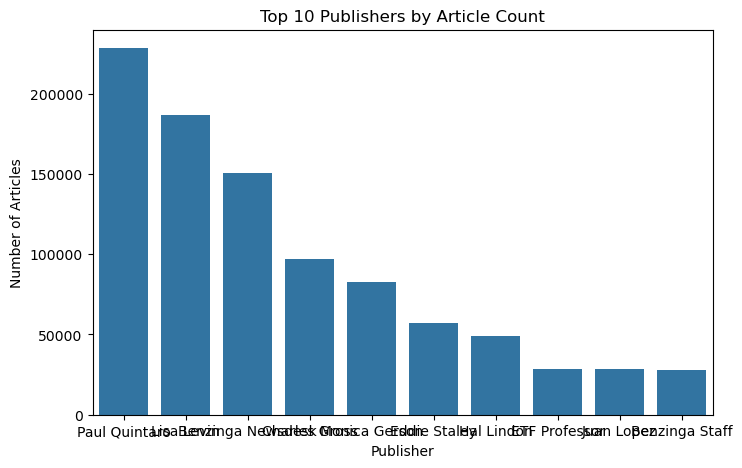

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of headline lengths
plt.figure(figsize=(8,5))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()

# Top 10 publishers by number of articles
top_publishers = df['publisher'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.show()
